In [1]:
pip install email

     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
     ---------------------------------- ----- 1.0/1.2 MB 4.7 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 3.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [26 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Chhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
      ~~~~^^
    File "C:\Users\Chhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Chhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\Chhav\AppData\Local\Temp\pip-build-env-liilbigg\overlay\Lib\site-packages\setuptools\build_meta.py", line 331, in g

In [2]:
import pandas as pd
import numpy as np
import re
import email
from email import policy
from email.parser import BytesParser
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
#Feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
#Model Bilding
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [9]:
#evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve)

In [10]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#Downloading required NLTK Data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger')

In [12]:
print("="*80)
print("ENRON EMAIL FRAUD DETECTION PROJECT")

ENRON EMAIL FRAUD DETECTION PROJECT


In [13]:
#STEP 1- DATA LOADING
print("\n[STEP 1] Loading Data...")


[STEP 1] Loading Data...


In [14]:
df = pd.read_csv('emails.csv')

In [16]:
print(f"Dataser Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

Dataser Shape: (517401, 2)

Columns: ['file', 'message']

First few rows:
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [17]:
print("\n[STEP 2] Data Exploration...")


[STEP 2] Data Exploration...


In [18]:
print(f"\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB
None


In [19]:
print(f"\nMissing Values:")
print(df.isnull().sum())


Missing Values:
file       0
message    0
dtype: int64


In [20]:
print(f"\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                             file  \
count                      517401   
unique                     517401   
top     zufferli-j/sent_items/99.   
freq                            1   

                                                  message  
count                                              517401  
unique                                             517401  
top     Message-ID: <28618979.1075842030037.JavaMail.e...  
freq                                                    1  


In [21]:
print("\n[STEP 3] Parsing Email Messages...")


[STEP 3] Parsing Email Messages...


In [86]:
def parse_email(raw_email):
    """Parse raw email message and extract components"""
    try:
        if isinstance(raw_email, str):
            msg = email.message_from_string(raw_email)
        else:
            return {}
        
        # Extract email components
        parsed = {
            'from': msg.get('From', ''),
            'to': msg.get('To', ''),
            'subject': msg.get('Subject', ''),
            'date': msg.get('Date', ''),
            'cc': msg.get('Cc', ''),
            'bcc': msg.get('Bcc', ''),
            'message_id': msg.get('Message-ID', ''),
            'body': ''
        }
        
        # Extract body
        if msg.is_multipart():
            for part in msg.walk():
                if part.get_content_type() == "text/plain":
                    try:
                        parsed['body'] = part.get_payload(decode=True).decode('utf-8', errors='ignore')
                    except:
                        parsed['body'] = ''
                    break
        else:
            try:
                parsed['body'] = msg.get_payload(decode=True).decode('utf-8', errors='ignore')
            except:
                parsed['body'] = msg.get_payload()
        
        return parsed
    except Exception as e:
        return {}

In [87]:
#Parse emails (Sample first 10000 for demonstratiob, adjust as needed)
sample_size = min(10000,len(df))
print(f"Prasing {sample_size} emails...")

Prasing 10000 emails...


In [88]:
parsed_emails = []
for idx, row in df.head(sample_size).iterrows():
    parsed = parse_email(row['message'])
    parsed['original_file'] = row['file'] if 'file' in df.columns else ''
    parsed_emails.append(parsed)

    if (idx+1) % 1000 == 0:
        print(f"Prased {idx + 1} emails...")

Prased 1000 emails...
Prased 2000 emails...
Prased 3000 emails...
Prased 4000 emails...
Prased 5000 emails...
Prased 6000 emails...
Prased 7000 emails...
Prased 8000 emails...
Prased 9000 emails...
Prased 10000 emails...


In [89]:
df_parsed = pd.DataFrame(parsed_emails)
print(f"\nParsed dataset shape: {df_parsed.shape}")



Parsed dataset shape: (10000, 9)


In [90]:
print("\n[STEP 4] Creatin Fraud Labels...")


[STEP 4] Creatin Fraud Labels...


In [91]:
fraud_keywords = [
    'confidential','secret','delete','destroy','shred','hide',
    'cover_up','offshore','accounting','manipulating','fraudulent',
    'illegal','unethical','misleading','false','fabricate',
    'conceal','backdating','insider','trading','scandal'
    
]

In [92]:
def detect_fraud_indicators(text):
    """Detect fraud indicators in email text"""
    if not isinstance(text,str):
        return 0

    text_lower = text.lower()
    score=0

    #check for fraud keywords
    for keyword in fraud_keywords:
        if keyword in text_lower:
            score += 1

    #check for suspicious patterns 
    if re.search(r'\b(urgent|asap|immediately|destroy|delete)\b',text_lower):
        score += 1
    if re.search(r'\$[\d,]+',text):
        score += 0.5
    if len(text) < 50:
        score+=0.5

    return score



In [93]:
#created combined text for analysis 
df_parsed['combined_text'] = (
    df_parsed['subject'].fillna('')+''+
    df_parsed['body'].fillna('')
)

In [94]:
#calculate fraud scores
df_parsed['fraud_score'] = df_parsed['combined_text'].apply(detect_fraud_indicators)


In [95]:
#label emails as fraud(1) or not fraud(0) based on threshold 
threshold = df_parsed['fraud_score'].quantile(0.85)
df_parsed['is_fraud'] = (df_parsed['fraud_score'] >= threshold).astype(int)


In [96]:
print(f"\nFraud distribution:")
print(df_parsed['is_fraud'].value_counts())
print(f"\nFraud percentage: {df_parsed['is_fraud'].mean()*100:.2f}%")



Fraud distribution:
is_fraud
0    8110
1    1890
Name: count, dtype: int64

Fraud percentage: 18.90%


In [97]:
print("\n[STEP 5] Cleaning Data...")


[STEP 5] Cleaning Data...


In [98]:
df_clean = df_parsed[df_parsed['body'].str.len() > 10].copy()
print(f"After removing empty emails: {df_clean.shape}")


After removing empty emails: (9951, 12)


In [120]:
def clean_email_text(text):
    if text is None:
        return ""

    from bs4 import BeautifulSoup
    import re

    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # keep words
    return text.lower().strip()


In [121]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].replace('', 'emptyemail')


In [101]:
df_clean['cleaned_text'] = df_clean['combined_text'].apply(clean_text)


In [102]:
print("\n[STEP 6] Feature Engineering...")



[STEP 6] Feature Engineering...


In [103]:
#text based features
df_clean['email_length'] =df_clean['body'].str.len()
df_clean['subject_length'] = df_clean['subject'].str.len()
df_clean['word_count'] = df_clean['body'].str.split().str.len()
df_clean['capital_ratio']=df_clean['body'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)),1)
)

In [104]:
#Count features 
df_clean['num_recipients']=df_clean['to'].str.count('@')
df_clean['has_cc']= (~df_clean['cc'].isna()).astype(int)
df_clean['has_bcc']= (~df_clean['bcc'].isna()).astype(int)

In [105]:
df_clean['has_urgent'] = df_clean['combined_text'].str.contains(
    'urgent|asap|immediately',case=False,na=False
).astype(int)

In [106]:
df_clean['has_money'] = df_clean['combined_text'].str.contains(
    r'\$[\d,]+', na=False
).astype(int)

In [107]:
df_clean['special_char_count']= df_clean['body'].apply(
    lambda x: len(re.findall(r'[^a-zA-Z0-9\s]',str(x)))
)

In [108]:
#time-based features (if date is parsable)
def extract_hour(date_str):
    try:
        date_obj = pd.to_datetime(date_str, errors='coerce')
        return date_obj.hour if pd.notna(date_obj) else -1
    except:
        return -1

In [109]:
df_clean['hour_sent'] = df_clean['date'].apply(extract_hour)
df_clean['is_night_email'] = ((df_clean['hour_sent'] >= 22)| df_clean['hour_sent'] <= 5).astype(int)


In [111]:
print(f"\nFeature engineering complete. New Features:")
feature_cols = ['email_length','subject_length','word_count','capital_ratio',
               'num_recipients','has_cc','has_bcc','has_urgent','has_money',
               'special_char_count','is_night_email']
print(feature_cols)


Feature engineering complete. New Features:
['email_length', 'subject_length', 'word_count', 'capital_ratio', 'num_recipients', 'has_cc', 'has_bcc', 'has_urgent', 'has_money', 'special_char_count', 'is_night_email']


In [112]:
#Remove rows with missing part
df_clean = df_clean.dropna(subset=['is_fraud'])

In [113]:
print("\n[STEP 7] Text Vectorization...")


[STEP 7] Text Vectorization...


In [114]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5
)

In [116]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].fillna('')
df_clean['cleaned_text'] = df_clean['cleaned_text'].astype(str)

In [65]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].replace('None', '')


In [122]:
X_tfidf = tfidf.fit_transform(df_clean['cleaned_text'])
print(X_tfidf.shape)


(9951, 1)


In [123]:
df_clean['cleaned_text'].head(20)


0     emptyemail
1     emptyemail
2     emptyemail
3     emptyemail
4     emptyemail
5     emptyemail
6     emptyemail
7     emptyemail
8     emptyemail
9     emptyemail
10    emptyemail
11    emptyemail
12    emptyemail
13    emptyemail
14    emptyemail
15    emptyemail
16    emptyemail
17    emptyemail
18    emptyemail
19    emptyemail
Name: cleaned_text, dtype: object

In [124]:
df_clean['cleaned_text'].apply(len).describe()


count    9951.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: cleaned_text, dtype: float64

In [125]:
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])]
)

In [126]:
# Combine with other features
X_features = df_clean[feature_cols].reset_index(drop=True)
X_combined = pd.concat([X_features, tfidf_df], axis=1)

# Target variable
y = df_clean['is_fraud'].reset_index(drop=True)

print(f"\nFinal feature matrix shape: {X_combined.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Final feature matrix shape: (9951, 12)
Target distribution:
is_fraud
0    8061
1    1890
Name: count, dtype: int64


In [127]:
print("\n[STEP 8] Splitting Data...")

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


[STEP 8] Splitting Data...
Training set size: (7960, 12)
Test set size: (1991, 12)


In [128]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
print("\n[STEP 9] Training Machine Learning Models...")


[STEP 9] Training Machine Learning Models...


In [130]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
}

In [131]:
results = {}

In [134]:
for name, model in models.items():
    print(f"\nTraining {name}....")

    #use scaled data for LR, original for tree-based
    if name == 'Logistic Regression':
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    elif name == 'Naive Bayes':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_proba=model.predict_proba(X_test)[:,1]
    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:,1]


Training Logistic Regression....

Training Naive Bayes....

Training Random Forest....

Training Gradient Boosting....

Training XGBoost....


In [135]:
#calculate metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred_proba)

results[name] ={
    'model':model,
    'accuracy':accuracy,
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'auc_roc':auc_roc,
    'y_pred': y_pred,
    'y_pred_proba':y_pred_proba
}

In [136]:
print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")

XGBoost - Accuracy: 0.9377, Precision: 0.9262, Recall: 0.7302, F1: 0.8166, AUC-ROC: 0.9585


In [137]:
print("\n[STEP 10] Model Evaluation...")


[STEP 10] Model Evaluation...


In [138]:
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [r['accuracy'] for r in results.values()],
    'Precision': [r['precision'] for r in results.values()],
    'Recall': [r['recall'] for r in results.values()],
    'F1-Score': [r['f1'] for r in results.values()],
    'AUC-ROC': [r['auc_roc'] for r in results.values()]
})

In [139]:
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))


Model Comparison:
  Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
XGBoost   0.93772   0.926174 0.730159  0.816568 0.958507


In [140]:
# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model_info = results[best_model_name]

In [141]:
print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*80}")


BEST MODEL: XGBoost


In [142]:
print(f"\nClassification Report:")
print(classification_report(y_test, best_model_info['y_pred']))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1613
           1       0.93      0.73      0.82       378

    accuracy                           0.94      1991
   macro avg       0.93      0.86      0.89      1991
weighted avg       0.94      0.94      0.93      1991



In [143]:
print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_model_info['y_pred'])
print(cm)


Confusion Matrix:
[[1591   22]
 [ 102  276]]


In [144]:
print("\n[STEP 11] Creating Visualizations...")


[STEP 11] Creating Visualizations...


Visualization saved as 'enron_fraud_detection_results.png'


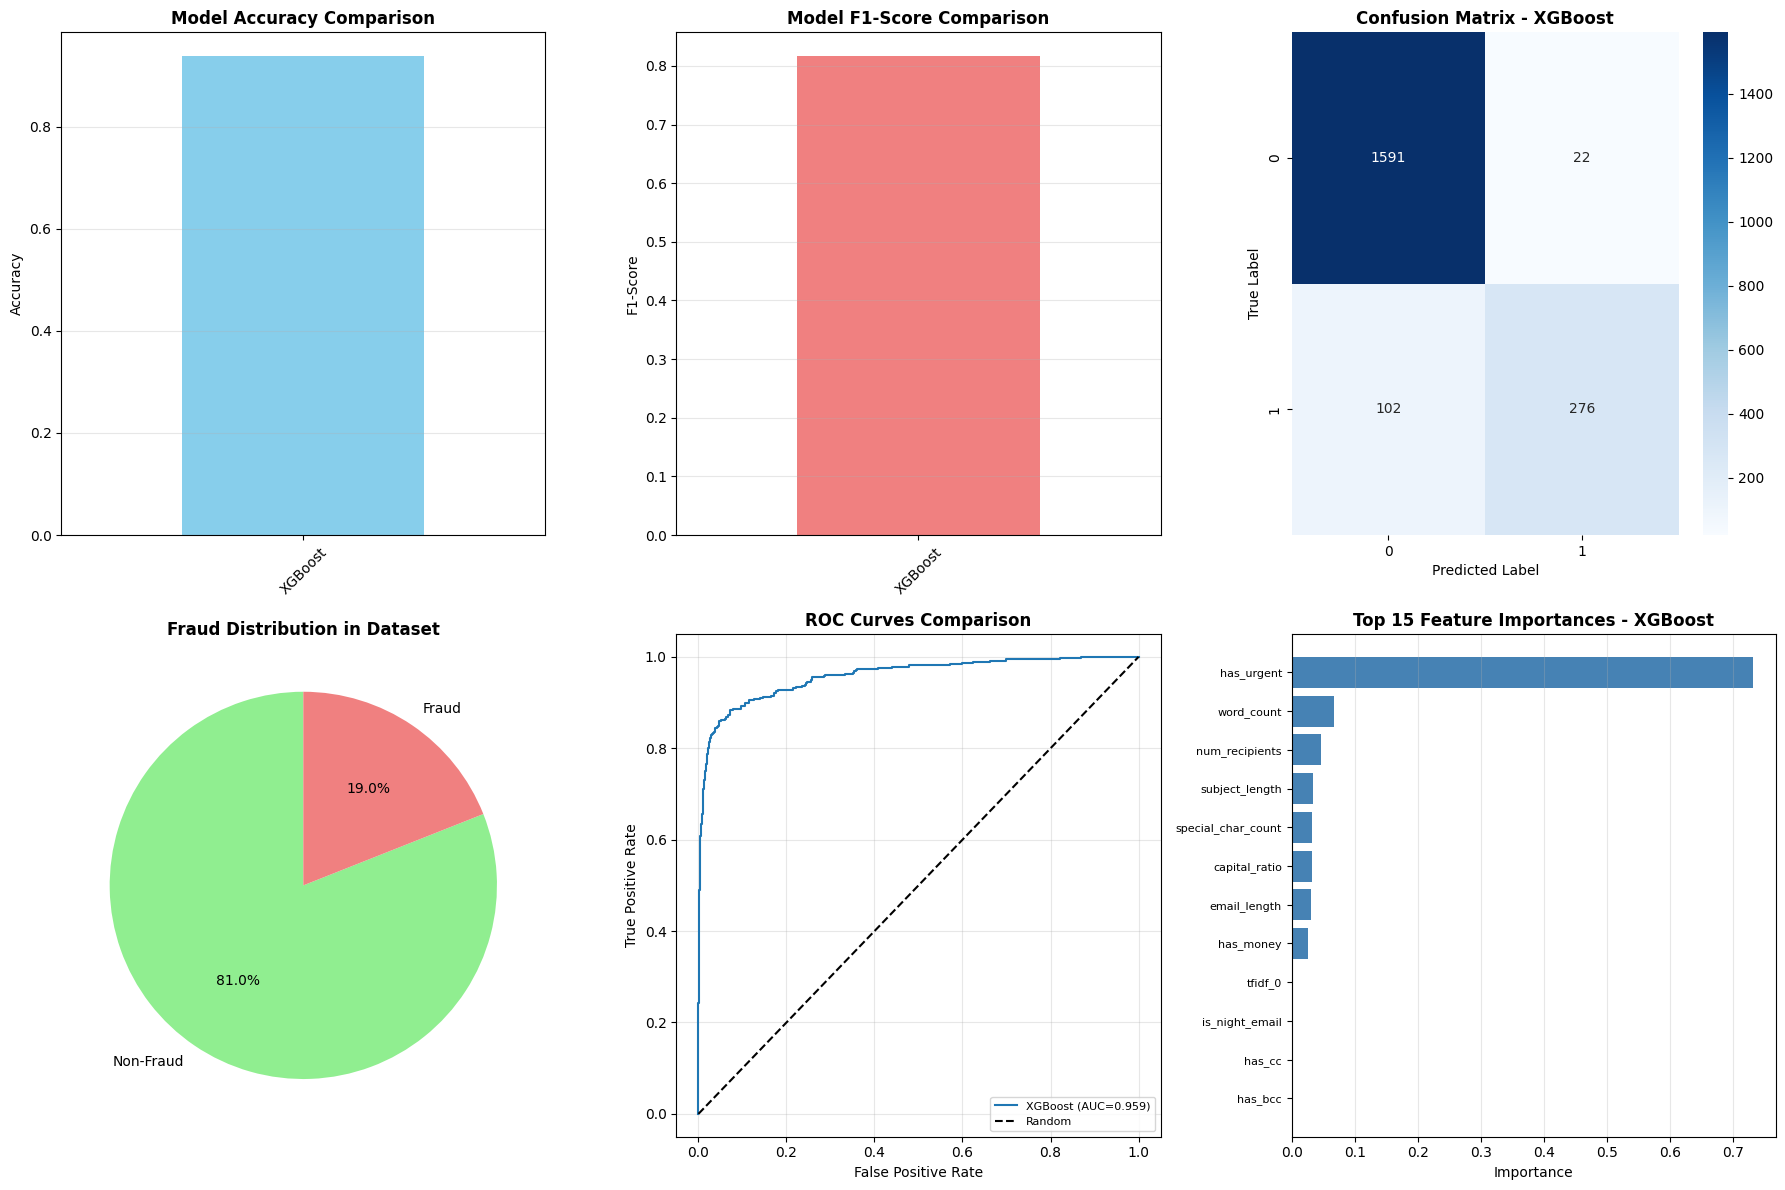

In [154]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model Comparison - Accuracy
ax = axes[0, 0]
comparison_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax, color='skyblue', legend=False)
ax.set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

# 2. Model Comparison - F1 Score
ax = axes[0, 1]
comparison_df.plot(x='Model', y='F1-Score', kind='bar', ax=ax, color='lightcoral', legend=False)
ax.set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

# 3. Confusion Matrix
ax = axes[0, 2]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# 4. Fraud Distribution
ax = axes[1, 0]
fraud_counts = y.value_counts()
ax.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', 
       colors=['lightgreen', 'lightcoral'], startangle=90)
ax.set_title('Fraud Distribution in Dataset', fontsize=12, fontweight='bold')

# 5. ROC Curves
ax = axes[1, 1]
for name, info in results.items():
    fpr, tpr, _ = roc_curve(y_test, info['y_pred_proba'])
    ax.plot(fpr, tpr, label=f"{name} (AUC={info['auc_roc']:.3f})")
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves Comparison', fontsize=12, fontweight='bold')
ax.legend(loc='lower right', fontsize=8)
ax.grid(alpha=0.3)

# 6. Feature Importance (for best tree-based model)
ax = axes[1, 2]
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    importances = best_model_info['model'].feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 features
    feature_names = X_combined.columns[indices]
    ax.barh(range(len(indices)), importances[indices], color='steelblue')
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels([f[:20] for f in feature_names], fontsize=8)
    ax.set_title(f'Top 15 Feature Importances - {best_model_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Importance')
else:
    ax.text(0.5, 0.5, 'Feature importance not available\nfor this model type', 
            ha='center', va='center', fontsize=12)
    ax.set_title('Feature Importance', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('enron_fraud_detection_results.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'enron_fraud_detection_results.png'")

Visualization saved as 'enron_fraud_detection_results.png'


<Figure size 640x480 with 0 Axes>

In [149]:
print("\n[STEP 12] Saving Results...")


[STEP 12] Saving Results...


In [150]:
# Save model comparison
comparison_df.to_csv('model_comparison.csv', index=False)
print("Model comparison saved to 'model_comparison.csv'")

Model comparison saved to 'model_comparison.csv'


In [151]:
# Save predictions
predictions_df = pd.DataFrame({
    'true_label': y_test,
    'predicted_label': best_model_info['y_pred'],
    'fraud_probability': best_model_info['y_pred_proba']
})
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [152]:
# Save feature importance
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    feature_importance_df = pd.DataFrame({
        'feature': X_combined.columns,
        'importance': best_model_info['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    feature_importance_df.to_csv('feature_importance.csv', index=False)
    print("Feature importance saved to 'feature_importance.csv'")

Feature importance saved to 'feature_importance.csv'


In [153]:
print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {best_model_info['accuracy']:.4f}")
print(f"Test F1-Score: {best_model_info['f1']:.4f}")
print(f"Test AUC-ROC: {best_model_info['auc_roc']:.4f}")
print("\nFiles generated:")
print("  - enron_fraud_detection_results.png")
print("  - model_comparison.csv")
print("  - predictions.csv")
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    print("  - feature_importance.csv")
print("="*80)


PROJECT COMPLETED SUCCESSFULLY!

Best Model: XGBoost
Test Accuracy: 0.9377
Test F1-Score: 0.8166
Test AUC-ROC: 0.9585

Files generated:
  - enron_fraud_detection_results.png
  - model_comparison.csv
  - predictions.csv
  - feature_importance.csv
